In [3]:
'''
Code copied from this source as recommended by Ebay official since current version of scikit-learn does not have pair confusion matrix
https://github.com/scikit-learn/scikit-learn/blob/master/sklearn/metrics/cluster/_supervised.py
'''
import numpy as np
from sklearn.metrics.cluster._supervised import contingency_matrix, check_clusterings
def pair_confusion_matrix(labels_true, labels_pred):
    """Pair confusion matrix arising from two clusterings.
    The pair confusion matrix :math:`C` computes a 2 by 2 similarity matrix
    between two clusterings by considering all pairs of samples and counting
    pairs that are assigned into the same or into different clusters under
    the true and predicted clusterings.
    Considering a pair of samples that is clustered together a positive pair,
    then as in binary classification the count of true negatives is
    :math:`C_{00}`, false negatives is :math:`C_{10}`, true positives is
    :math:`C_{11}` and false positives is :math:`C_{01}`.
    Read more in the :ref:`User Guide <pair_confusion_matrix>`.
    Parameters
    ----------
    labels_true : array-like of shape (n_samples,), dtype=integral
        Ground truth class labels to be used as a reference.
    labels_pred : array-like of shape (n_samples,), dtype=integral
        Cluster labels to evaluate.
    Returns
    -------
    C : ndarray of shape (2, 2), dtype=np.int64
        The contingency matrix.
    See Also
    --------
    rand_score: Rand Score
    adjusted_rand_score: Adjusted Rand Score
    adjusted_mutual_info_score: Adjusted Mutual Information
    Examples
    --------
    Perfectly matching labelings have all non-zero entries on the
    diagonal regardless of actual label values:
      >>> from sklearn.metrics.cluster import pair_confusion_matrix
      >>> pair_confusion_matrix([0, 0, 1, 1], [1, 1, 0, 0])
      array([[8, 0],
             [0, 4]]...
    Labelings that assign all classes members to the same clusters
    are complete but may be not always pure, hence penalized, and
    have some off-diagonal non-zero entries:
      >>> pair_confusion_matrix([0, 0, 1, 2], [0, 0, 1, 1])
      array([[8, 2],
             [0, 2]]...
    Note that the matrix is not symmetric.
    References
    ----------
    .. L. Hubert and P. Arabie, Comparing Partitions, Journal of
      Classification 1985
      https://link.springer.com/article/10.1007%2FBF01908075
    """
    labels_true, labels_pred = check_clusterings(labels_true, labels_pred)
    n_samples = np.int64(labels_true.shape[0])

    # Computation using the contingency data
    contingency = contingency_matrix(
        labels_true, labels_pred, sparse=True
        )#, dtype=np.int64)
    n_c = np.ravel(contingency.sum(axis=1))
    n_k = np.ravel(contingency.sum(axis=0))
    sum_squares = (contingency.data ** 2).sum()
    C = np.empty((2, 2), dtype=np.int64)
    C[1, 1] = sum_squares - n_samples
    C[0, 1] = contingency.dot(n_k).sum() - sum_squares
    C[1, 0] = contingency.transpose().dot(n_c).sum() - sum_squares
    C[0, 0] = n_samples ** 2 - C[0, 1] - C[1, 0] - sum_squares
    return C

In [4]:
import pandas as pd
akshit_df = './mlchallenge_set_2021.tsv'
akshit_valid = './mlchallenge_set_validation.tsv'
sam_df = 'C:/Users/sjmal/OneDrive/Desktop/ML/2021/mlchallenge_set_2021_edited.txt'
sam_valid = 'C:/Users/sjmal/OneDrive/Desktop/ML/2021/mlchallenge_set_validation.tsv'
#SA_valid=pd.read_table('/Users/shivankagrawal/Documents/ebay/mlchallenge_set_validation.tsv',header=None)
#SA_df=pd.read_table('/Users/shivankagrawal/Documents/ebay/mlchallenge_set_2021.tsv',header=None)
#df=SA_df
#valid=SA_valid 
df = pd.read_table(akshit_df)
valid = pd.read_table(akshit_valid,sep='\t')
SA_valid = valid
SA_df = df
df.columns=['category','primary_image_url','All Links','Tags','index']
valid.columns=['ID', 'Group']

In [5]:
"""
Import test output file as dataframe and set the index.
"""
output = './akshit.tsv'
predictions = pd.read_table(output,header=None)
predictions.columns = ['ID', 'Group']
predictions.set_index('ID', inplace=True)
valid.set_index('ID', inplace=True)

In [6]:
print(predictions)

          Group
ID             
0             1
1             2
2             3
3             4
4             5
...         ...
1006085  900113
1006086  900114
1006087  900115
1006088  900116
1006089  900117

[1002275 rows x 1 columns]


In [7]:
"""
Compute confusion matrix for validation data. Use valid dataframe to extract values from a tsv output file.
"""
preds = []
actuals = []
for index, row in valid.iterrows():
    preds.append(predictions.loc[index]['Group'])
    actuals.append(row['Group'])
# print(preds[100:200])
# print(actuals[100:200])
def evaluate(actuals, preds):
    C = pair_confusion_matrix(actuals, preds)
    precision = C[1][1] / (C[1][1] + C[0][1]) # (true positives) / (true positives + false positives)
    recall = C[1][1] / (C[1][1] + C[1][0]) # (true positives) / (true positives + false negatives)
    print(f'Confusion Matrix:\n{C}')
    print(f'precision: {precision}')
    print(f'recall: {recall}')
    print(f'f1 score: {2 * precision * recall / (precision + recall)}')

evaluate(actuals, preds)

Confusion Matrix:
[[154782676      2892]
 [     3974      1380]]
precision: 0.32303370786516855
recall: 0.2577512140455734
f1 score: 0.2867234573031373


In [8]:
print(df.head())
print(valid.head())

   category                                  primary_image_url  \
0         2  https://i.ebayimg.com/00/s/MTA1OFgxMTM0/z/KPIA...   
1         2  https://i.ebayimg.com/00/s/MTIwMFgxNjAw/z/flIA...   
2         2  http://i.ebayimg.com/00/s/ODAwWDEwNjc=/z/XHcAA...   
3         2  https://i.ebayimg.com/00/s/MTA2N1gxNjAw/z/scsA...   
4         2  https://i.ebayimg.com/00/s/MTIwMFgxNjAw/z/HDIA...   

                                           All Links  \
0  https://i.ebayimg.com/00/s/MTA1OFgxMTM0/z/KPIA...   
1  https://i.ebayimg.com/00/s/MTIwMFgxNjAw/z/flIA...   
2  http://i.ebayimg.com/00/s/ODAwWDEwNjc=/z/XHcAA...   
3  https://i.ebayimg.com/00/s/MTA2N1gxNjAw/z/scsA...   
4  https://i.ebayimg.com/00/s/MTIwMFgxNjAw/z/HDIA...   

                                                Tags  index  
0  (Color:Gray/White,Country/Region of Manufactur...      1  
1  (Style:Cleats,Color:White Orange,US Shoe Size ...      2  
2  (Width:Medium (D, M),US Size:9,Brand:VANS,Colo...      3  
3  (US Shoe Size (

In [9]:
#split links into list (for now only does first 100)
i = 0
for link in df['All Links'][0:100]:
    df['All Links'][i] = link.split(';')
    i+=1
print(df['All Links'][0:100])

<ipython-input-9-5e0f35be6386>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['All Links'][i] = link.split(';')


0     [https://i.ebayimg.com/00/s/MTA1OFgxMTM0/z/KPI...
1     [https://i.ebayimg.com/00/s/MTIwMFgxNjAw/z/flI...
2     [http://i.ebayimg.com/00/s/ODAwWDEwNjc=/z/XHcA...
3     [https://i.ebayimg.com/00/s/MTA2N1gxNjAw/z/scs...
4     [https://i.ebayimg.com/00/s/MTIwMFgxNjAw/z/HDI...
                            ...                        
95    [https://i.ebayimg.com/00/s/MTYwMFgxMjAw/z/GoA...
96    [https://i.ebayimg.com/00/s/MTYwMFgxMjAw/z/Hm0...
97    [https://i.ebayimg.com/00/s/MTYwMFgxMjAw/z/VhA...
98    [https://i.ebayimg.com/00/s/MTYwMFgxNjAw/z/n4o...
99    [https://i.ebayimg.com/00/s/NTY1WDExMjU=/z/cGU...
Name: All Links, Length: 100, dtype: object


In [10]:
"""
Frequency counting of the tags in a particular category.
"""
import re
from collections import Counter
# for category in range(1, 6):
df = SA_df
df = df.loc[df['category'] == 5]
freq=Counter()
attribute=[['']]*len(df)
print('allocated array')
trialrange=len(df)
for x in range(0, trialrange, 5):#range(int(len(df)/10)):#len(df)
    attribute[x]=df.iloc[x,3].lower()
    attribute[x] = attribute[x][1:-1] # remove starting and ending parentheses
    attribute[x] = re.split(r',(?![^(]*\))', attribute[x]) # ignore commas that are inside parentheses
    attribute[x] = [a.split(':') for a in attribute[x]]
    freq+=Counter([i[0] for i in attribute[x]])
    tempdict={}
#     print(df.iloc[x,3])
    #print(attribute[x])
#     print(attribute)
    for i in attribute[x]:
        try:
            tempdict[i[0]]=float(i[1])
        except:
            try:
                tempdict[i[0]]=i[1]
            except:
                pass
    attribute[x]=tempdict
#     print(attribute[x])
df = SA_df
print("am out of loop")

allocated array
am out of loop


{'brand': 6078, 'mpn': 5245, 'model': 2939, 'type': 2560, 'upc': 2189, 'ean': 1605, 'cord type': 1498, 'bagged/bagless': 1341, 'color': 1285, 'filters': 1020, 'features': 1018, 'manufacturer': 887, 'isbn': 823, 'country/region of manufacture': 634, 'custom bundle': 612, 'modified item': 532, 'item weight': 487, 'shipping weight': 470, 'power': 456, 'product dimensions': 397, '': 353, 'item model number': 341, 'voltage': 294, 'non-domestic product': 256, 'productgroup': 253, 'included accessories': 233, 'binding': 232, 'label': 227, 'publisher': 215, 'bag/bagless': 211, 'shipping': 180, 'item_length': 179, 'weight': 170, 'manufacturer part number': 167, 'edge cleaning': 166, 'item_width': 163, 'partnumber': 162, 'size': 156, 'category': 154, 'tax': 154, 'style': 148, 'filter type': 147, 'batteries': 139, 'handle controls': 130, 'bundle listing': 120, 'numberofitems': 117, 'color family': 117, 'amperage (amps)': 111, 'carpet cleaning': 110, 'package dimensions': 104, 'model number': 104,

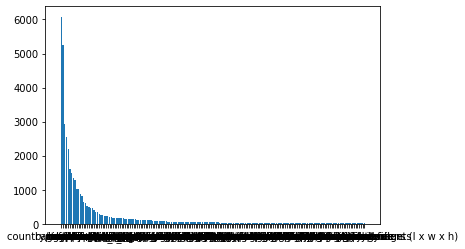

In [11]:
d = dict((k, v) for k, v in freq.items() if v > 20)
array = list(sorted(d, key=lambda k: d[k],reverse=True))[:10]
d= {k: v for k, v in sorted(d.items(), key=lambda item: item[1],reverse=True)}
print(d)
print(array)
import matplotlib.pyplot as plt
#import matplotlib.pyplot as plt
plt.bar(d.keys(),d.values())
plt.show()

In [13]:
df = SA_df

In [16]:
import re
validation_rows = df.loc[df['index'].isin(valid.index)]
validation_rows = validation_rows.loc[validation_rows['category'] == 1]
c1_rows = df.loc[df['category'] == 1]
c3_rows = df.loc[df['category'] == 3]
c4_rows = df.loc[df['category'] == 4]
keep_tags = ['brand', 'size type', "bottoms size (women's)", 'material', 'inseam', 'color', 'rise', 'style', 'silhouette', 'country/region of manufacture']
keep_tags = ['brand', 'material', 'type', 'pattern', 'model', 'country/region of origin', 'mpn', 'country/region of manufacture', 'handle material', 'number of settings']
keep_tags =  ['brand', 'color', 'material', 'type', 'mpn', 'pattern', 'bed size', 'size', 'country/region of manufacture', 'style']
# df = category5
def register_attributes(attribute, all_attributes):
    attribute = attribute[1:-1].lower() # attribute = re.sub(r'[()]','', attribute)
    attribute = re.split(r',(?![^(]*\))', attribute)
    attribute = [a.split(':') for a in attribute]
    for i, a in enumerate(attribute):
        attribute[i] = [s.strip() for s in a]
        if attribute[i][0] in keep_tags:
            all_attributes.add(attribute[i][0])
    #print(f'atttribute is: {attribute}')
    mapping = {}
    #for i in range(len(attribute) - 1):
    #    if i == len(attribute) - 2:
    #        mapping[attribute[i][-1]] = attribute[i + 1][:]
    #    else:
    #        mapping[attribute[i][-1]] = attribute[i + 1][:-1]
    return(attribute)

def map_attributes(attribute, num_attributes, index_to_attr):
    attribute = attribute[1:-1].lower() # attribute = re.sub(r'[()]','', attribute)
    attribute = re.split(r',(?![^(]*\))', attribute)
    attribute = [a.split(':') for a in attribute]
    all_attributes_for_row = [None] * num_attributes
    for i, a in enumerate(attribute):
        attribute[i] = [s.strip() for s in a]
        #print(f'index: {attr_to_index[attribute[i][0]]}')
        if len(attribute[i]) > 1 and attribute[i][0] in keep_tags:
            all_attributes_for_row[attr_to_index[attribute[i][0]]] = attribute[i][1]
    mapping = {}
    #for i in range(len(attribute) - 1):
    #    if i == len(attribute) - 2:
    #        mapping[attribute[i][-1]] = attribute[i + 1][:]
    #    else:
    #        mapping[attribute[i][-1]] = attribute[i + 1][:-1]
    return all_attributes_for_row
m = 2000
all_attributes = set()
all_maps = []
for index,row in c4_rows[0:].iterrows():
    register_attributes(row['Tags'], all_attributes)

all_attributes = list(all_attributes)
attr_to_index = {all_attributes[i]: i for i in range(len(all_attributes))}
#print(attr_to_index)
#print(f'numAttributes: {len(all_attributes)}')

for index,row in c4_rows[0:].iterrows():
    all_maps.append(map_attributes(row['Tags'], len(all_attributes), attr_to_index))
possible_vals = set()
from collections import Counter
c = Counter()
for v in all_maps:
    possible_vals.update(v)
    c.update(v)
print(len(possible_vals))
print(c)

20360
Counter({None: 204546, 'does not apply': 12396, '100% cotton': 9725, 'twin': 7860, 'sheet sets': 7615, 'queen': 6815, 'solid': 6393, 'king': 5490, 'flat sheets': 5357, 'white': 4581, 'full': 4482, 'india': 3994, 'unbranded': 3969, 'as described': 3529, 'china': 3368, 'floral': 2978, 'sheet set': 2851, 'multi-color': 2841, 'ralph lauren': 2701, 'pillowcases': 2692, 'blue': 2442, 'united states': 2436, 'cotton blend': 2365, 'modern': 1870, 'cotton': 1844, 'fitted sheets': 1838, 'striped': 1833, 'polyester': 1563, 'microfiber': 1544, 'traditional': 1528, 'pink': 1328, 'gray': 1205, 'flat sheet': 1175, 'not applicable': 1029, 'ivory': 958, 'cottage': 901, 'double': 889, 'contemporary': 871, 'green': 848, 'california king': 840, 'amrapur': 788, 'black': 781, 'red': 719, 'standard': 718, 'handmade': 710, 'beige': 705, 'unknown': 702, 'wamsutta': 702, 'pakistan': 655, 'egyptian cotton': 650, 'multicolor': 607, 'fitted sheet': 594, 'twin extra long': 591, 'purple': 569, 'brown': 564, 'to

In [16]:
#dataframe with attribute values
categories = pd.DataFrame(all_maps)
print(categories)

                      0       1      2         3     4             5  \
0                diesel  26 in.  34.25      None   low  straight leg   
1                diesel  26 in.  36.25      None   low  straight leg   
2         true religion  26 in.     32      None   low  straight leg   
3                diesel  26 in.  31.25      None   low      boot cut   
4                diesel  27 in.     36      None   low  straight leg   
...                 ...     ...    ...       ...   ...           ...   
501565           levi's       9  31 in     flare  None          None   
501566          ruby rd      24   None      None  None          None   
501567  current/elliott  24 in.   None     cargo  None          None   
501568           levi's  32 in.   None      None  None  straight leg   
501569            frame  32 in.   None  straight  high          None   

                    6      7                       8        9  
0               italy   None                   denim  regular  
1      

In [25]:
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder()
x = oh.fit_transform(all_maps)
print(x)
print(type(x))

  (0, 4545)	1.0
  (0, 7714)	1.0
  (0, 9374)	1.0
  (0, 14437)	1.0
  (0, 15423)	1.0
  (0, 15487)	1.0
  (0, 16151)	1.0
  (0, 19892)	1.0
  (0, 20881)	1.0
  (0, 21276)	1.0
  (1, 6961)	1.0
  (1, 7253)	1.0
  (1, 10693)	1.0
  (1, 14427)	1.0
  (1, 15423)	1.0
  (1, 15487)	1.0
  (1, 16151)	1.0
  (1, 17400)	1.0
  (1, 20881)	1.0
  (1, 21020)	1.0
  (2, 6961)	1.0
  (2, 7714)	1.0
  (2, 10487)	1.0
  (2, 14437)	1.0
  (2, 15423)	1.0
  :	:
  (42863, 15487)	1.0
  (42863, 16151)	1.0
  (42863, 17483)	1.0
  (42863, 20772)	1.0
  (42863, 21276)	1.0
  (42864, 2443)	1.0
  (42864, 7714)	1.0
  (42864, 11615)	1.0
  (42864, 14437)	1.0
  (42864, 15423)	1.0
  (42864, 15487)	1.0
  (42864, 16151)	1.0
  (42864, 17491)	1.0
  (42864, 20881)	1.0
  (42864, 21276)	1.0
  (42865, 6961)	1.0
  (42865, 7714)	1.0
  (42865, 8731)	1.0
  (42865, 13927)	1.0
  (42865, 15017)	1.0
  (42865, 15448)	1.0
  (42865, 16151)	1.0
  (42865, 16207)	1.0
  (42865, 20595)	1.0
  (42865, 21276)	1.0
<class 'scipy.sparse.csr.csr_matrix'>


In [26]:
oh.categories_

[array(['#010', '#777248', '#9508', ..., 'zzkkhpzg', '並行輸入品', None],
       dtype=object),
 array(['', '.', '1 (one) queen fitted sheet 63" x 81"',
        '1 - twin flat sheet', '1 euro sham', '1 fitted',
        '1 fitted & 1 flat sheet', '1 fitted bottom sheet',
        '1 fitted sheet', '1 fitted sheet & 2 pillowcases',
        '1 fitted sheet & 4 flat sheets',
        '1 fitted sheet + 1 flat sheet + 4 pillowcases', '1 flat',
        '1 flat & 1 fitted sheet', '1 flat & 1 fitted sheets',
        '1 flat / 1 fitted', '1 flat 1 fitted sheet', '1 flat sheet',
        '1 flat sheet & 1 fitted sheet',
        '1 flat sheet+ 2 fitted sheet + 2 pillow',
        '1 flat sheets+1 fitted sheet+4 pillowcase',
        '1 full & 1 fitted sheet', '1 king flat sheet', '1 king sham',
        '1 pc bed skirt', '1 pc fitted sheet', '1 pillowcase',
        '1 queen flat sheet', '1 queen size fitted sheet', '1 sham',
        '1 single pillowcase', '1 single sham', '1#~6# (optional)',
        '100% ca

In [18]:
print(c4_rows.head())

       category                                  primary_image_url  \
32254         4  https://i.ebayimg.com/00/s/NDUwWDU5Mw==/z/YbQA...   
32255         4  http://i.ebayimg.com/00/s/ODQxWDEyMDA=/z/rqoAA...   
32256         4  https://i.ebayimg.com/00/s/OTAwWDEyMDA=/z/ViEA...   
32257         4  http://i.ebayimg.com/00/s/MTYwMFgxMzA2/z/ipIAA...   
32258         4  https://i.ebayimg.com/00/s/MTU5OVgxMjAw/z/OeUA...   

                                               All Links  \
32254  https://i.ebayimg.com/00/s/NDUwWDU5Mw==/z/YbQA...   
32255  http://i.ebayimg.com/00/s/ODQxWDEyMDA=/z/rqoAA...   
32256  https://i.ebayimg.com/00/s/OTAwWDEyMDA=/z/ViEA...   
32257  http://i.ebayimg.com/00/s/MTYwMFgxMzA2/z/ipIAA...   
32258  https://i.ebayimg.com/00/s/MTU5OVgxMjAw/z/OeUA...   

                                                    Tags  index  
32254             (MPN:Does not Apply,Brand:Home Source)  32604  
32255  (Bed Size:Crib,Brand:Pottery Barn Kids,Color:g...  32605  
32256               

In [19]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=200, random_state=0,verbose=True, n_init=1, max_iter = 15).fit(x)

Initialization complete
Iteration 0, inertia 242760.0
Iteration 1, inertia 162395.67975218326
Iteration 2, inertia 156720.8296728084
Iteration 3, inertia 155345.1805892631
Iteration 4, inertia 154801.32483640683
Iteration 5, inertia 154488.59779731228
Iteration 6, inertia 154296.9848849921
Iteration 7, inertia 154169.00487732416
Iteration 8, inertia 154051.7239831928
Iteration 9, inertia 153916.3098203254
Iteration 10, inertia 153761.58122922518
Iteration 11, inertia 153657.94932715085
Iteration 12, inertia 153568.2559645688
Iteration 13, inertia 153490.18112328567
Iteration 14, inertia 153435.68148531354


In [21]:
"""
Analysis of K-Means output
"""
count = {}
preds = []
actuals = []
for i, label in enumerate(kmeans.labels_):
    if label not in count:
        count[label] = 0
    count[label] += 1
#     print(f'row {i}\n: {df.iloc[i]}')
    ID = c4_rows.iloc[i]['index']
    if ID in valid.index:
        preds.append(label)
        actual = valid.loc[ID]['Group']
        actuals.append(actual)
#     print(f'ID: {ID}, pred: {label}, actual: {actual}')
print(count)
print(kmeans.inertia_)
print(len(preds))

evaluate(actuals, preds)

{12: 978, 112: 207, 135: 107, 3: 191, 38: 194, 62: 197, 178: 153, 5: 389, 88: 357, 70: 162, 19: 289, 156: 249, 2: 3733, 81: 296, 123: 231, 121: 331, 137: 115, 18: 223, 6: 298, 14: 339, 141: 152, 145: 227, 194: 119, 74: 405, 41: 68, 140: 246, 182: 1446, 58: 247, 13: 244, 196: 154, 197: 192, 120: 122, 21: 178, 0: 357, 139: 244, 10: 724, 99: 197, 153: 199, 103: 125, 53: 205, 136: 191, 47: 146, 193: 286, 11: 130, 117: 319, 22: 103, 51: 187, 199: 167, 143: 86, 27: 206, 7: 179, 184: 23, 69: 137, 31: 264, 155: 121, 72: 78, 108: 117, 134: 183, 66: 149, 9: 884, 171: 362, 20: 242, 147: 177, 186: 131, 8: 139, 92: 331, 115: 251, 172: 98, 48: 404, 116: 61, 192: 167, 142: 178, 40: 301, 127: 322, 42: 265, 150: 106, 114: 56, 166: 129, 138: 154, 167: 199, 60: 33, 16: 141, 133: 178, 101: 290, 86: 321, 43: 547, 159: 157, 77: 274, 54: 370, 4: 1264, 163: 193, 78: 300, 52: 398, 15: 253, 95: 172, 28: 182, 102: 193, 33: 213, 67: 184, 89: 108, 71: 218, 190: 40, 151: 295, 107: 178, 169: 210, 97: 93, 85: 217, 63

In [34]:
from sklearn.cluster import AgglomerativeClustering

def cluster(data):
    clustering = AgglomerativeClustering(compute_distances=True,compute_full_tree = True,distance_threshold = 0.1,n_clusters=None).fit(data)
    print(clustering)
#     print("LABELS")
#     print(clustering.labels_)
#     print(len(clustering.labels_))
#     print(len(set(clustering.labels_)))
#     print("DISTAnCES")
#     print(clustering.distances_)
#     print("num connected components")
#     print(clustering.n_connected_components_)
    # make this better
    # make this work on the entire dataset
    # fix nonetypes
    # don't punish missing attributes, but punish conflicts. how do we encode this?

    return clustering

In [35]:
x = x.toarray() # only run this once

In [ ]:
# x *= 10
x

In [ ]:
full_clustering = [0] * len(x)
count_so_far = 0
for label in count:
    indices = [i for i in range(x.shape[0]) if kmeans.labels_[i] == label]
    data = [x[i] for i in indices]
    print(f'now clustering group {label} which has {len(data)} items')
    c = cluster(data)
    for i, label in enumerate(c.labels_):
        full_clustering[indices[i]] = label + count_so_far
#     print(c.labels_)
    count_so_far += len(data)

now clustering group 19 which has 2066 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
now clustering group 155 which has 179 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
now clustering group 47 which has 1448 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
now clustering group 126 which has 429 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
now clustering group 108 which has 224 items
AgglomerativeClustering(compute_distances=True, compute_full_tree=True,
                        distance_threshold=0.1, n_clusters=None)
now clustering group 171 which has 54 items
AgglomerativeClustering(compute_distances=True

In [33]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

<ipython-input-33-1390d13c0cdd>:4: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [29]:
groups = {}
for i, label in enumerate(full_clustering):
    if label not in groups:
        groups[label] = []
    groups[label].append(i)
groups = {label: groups[label] for label in groups if len(groups[label]) > 1}
print(groups)
for label in groups:
    print(f'GROUP: {label}')
    for item in groups[label]:
        print(validation_rows['Tags'].iloc[[item]].to_string())
    print('-----------------')

{2117: [1, 2795], 2952: [4, 4387], 2842: [5, 90, 2821], 2014: [6, 143], 4355: [7, 3606], 5259: [8, 1840, 6415], 4814: [9, 419, 837, 4368, 6435], 4049: [12, 1217, 2049, 3662, 6504], 1986: [13, 1638, 3690], 357: [16, 5256], 231: [17, 5397], 2238: [21, 6393], 5548: [24, 4815], 5118: [28, 189, 650, 740, 771, 1331, 1578, 1859, 2577, 2781, 3148, 3157, 3542, 4400, 4488, 4591, 6326, 6346], 4774: [31, 1881, 2167, 3014, 4151, 4413, 5065, 6730], 2773: [34, 76, 79, 200, 237, 244, 608, 709, 1035, 1039, 1293, 1646, 1768, 2520, 3829, 3955, 3957, 4276, 4636, 4638, 4639, 4999, 5310, 5436, 6056, 6063, 6176, 6757], 2286: [35, 2100], 4787: [37, 730], 5065: [41, 4848], 64: [45, 6070, 6175], 4199: [47, 598], 289: [49, 212], 4177: [50, 353, 982], 2738: [51, 4537, 6420], 1968: [52, 675, 1441, 4108, 5224, 6827], 3100: [59, 2369, 3561], 4752: [60, 888, 2272], 1039: [63, 5401], 4115: [71, 4244, 4741], 4725: [73, 3111, 6190], 1124: [74, 1660], 2743: [77, 5150, 5573], 4846: [81, 230, 268, 839, 3101, 3126, 3507, 49

797897    (Model:Levi's 529,Size Type:Regular,Treatment:...
806830    (Treatment:Medium Wash,Rise:Mid,Pattern:Solid,...
841008    (Rise:Mid-Rise,Silhouette:Bootcut,Brand:Levi's...
-----------------
GROUP: 4076
59342    (Inseam:31,Model:560,Length:Ankle,Pattern:Soli...
580338    (Country/Region of Manufacture:United States,C...
770963    (Material:100% Cotton,Model:Levi's 550,Color:B...
-----------------
GROUP: 769
59454    (Brand:Eileen Fisher,Size Type:Petites,Wash:Co...
807719    (Bottoms Size (Women's):10P,Inseam:26,Country ...
-----------------
GROUP: 4950
59591    (Rise:Low,Brand:Old Navy,Color:Blue,Bottoms Si...
445179    (Length:Ankle,Inseam:31,Garment Care:Machine W...
732527    (Size Type:Regular,Material:Cotton Blend,Insea...
814391    (Material:Cotton Blend,Wash:Distressed,Color:d...
-----------------
GROUP: 2767
59788    (Wash:Embellished,Brand:Miss Me,Bottoms Size (...
459882    (Accents:Embellished,Bottoms Size (Women's):26...
916283    (Material:Denim,Modified Item:No,Le

800466    (Length:Full Length,Inseam:29,Material:Cotton ...
-----------------
GROUP: 514
63706    (Brand:NYDJ,Wash:Dark,Style:Straight Leg,Rise:...
752708    (Material:Denim,Brand:NYDJ,Color:Blue,Inseam:3...
-----------------
GROUP: 46
63771    (Wash:Medium,Material:Denim,Rise:Mid-Rise,Size...
650318    (Treatment:Distressed,Inseam:30,Bottoms Size (...
772954    (Color:Blue,Bottoms Size (Women's):10,Modified...
-----------------
GROUP: 4055
63830    (Rise:Mid,Material:Denim,Model:Lolita Boot,Siz...
230376    (Rise:Mid,Model:Lolita Boot,Material:Denim,Tre...
576300    (Silhouette:Bootcut,Rise:Mid Rise,Pattern:Soli...
590349    (Wash:Medium,Bottoms Size (Women's):12,Brand:L...
782337    (UPC:Does Not Apply,Style:Boot Cut,Inseam:31,C...
808840    (Color:Blue,Garment Care:Machine Washable,Leng...
850435    (Material:Denim,Model:Lucky Brand,Pattern:Soli...
-----------------
GROUP: 4829
63869    (Length:Full Length,Inseam:31,Treatment:Dark W...
586102    (Size Type:Regular,Pattern:Solid,Mate

605538    (Brand:Diesel,Color:Blue,Features:Stretch,Garm...
642366    (Material:Cotton Blend,Treatment:Distressed,Vi...
659277    (Brand:Diesel,Size Type:Regular,Rise:Low,Color...
705630    (Material:Cotton Blend,Model:Diesel Getlegg,Br...
711809    (Silhouette:Bootcut,Rise:Low,Bottoms Size (Wom...
829675    (Color:Blue,Pattern:Solid,Rise:Mid,Silhouette:...
-----------------
GROUP: 284
66714    (Rise:Mid,Material:Denim, Stretch,Bottoms Size...
845156    (Color:Blue,Inseam:33,Bottoms Size (Women's):4...
-----------------
GROUP: 2799
66801    (Length:Crop,Size Type:Regular,Silhouette:Skin...
91885    (Bottoms Size (Women's):24 in.,Brand:Diesel,Co...
256235    (Material:Cotton Blend,Brand:Diesel,Inseam:32,...
-----------------
GROUP: 4859
66952    (Bottoms Size (Women's):26 in.,Treatment:Black...
246069    (Inseam:31,Wash:Distressed,Country/Region of M...
447247    (Rise:Low,Silhouette:Flare,Inseam:31,Material:...
640864    (Color:Blue,Material:Cotton Blend,Wash:Dark,Bo...
784855    (Bott

846502    (Inseam:29,Material:Cotton Blend,Brand:Old Nav...
-----------------
GROUP: 2833
78813    (Style:Slim Skinny,Bottoms Size (Women's):26,B...
789839    (MPN:Does Not Apply,Model:Straight Leg,Modifie...
794506    (Inseam:32,Bottoms Size (Women's):26,Treatment...
833498    (Treatment:Distressed,Bottoms Size (Women's):2...
-----------------
GROUP: 2732
79018    (Accents:Embellished,Brand:Miss Me,Color:Blue,...
227114    (Country/Region of Manufacture:United States,G...
300192    (Accents:Embroidered,Top Stitch,Bottoms Size (...
599994    (Size Type:Regular,Accents:Embellished,Embroid...
823827    (Length:Full Length,Inseam:32,Size Type:Regula...
827579    (Material:Cotton Blend,Size Type:Regular,Style...
839740    (Inseam:32,Material:Cotton Blend,Bottoms Size ...
854390    (Material:Cotton Blend,Rise:Low,Silhouette:Boo...
-----------------
GROUP: 4802
79076    (Bottoms Size (Women's):26 in.,Brand:Miss Me,G...
458571    (Wash:Medium,Bottoms Size (Women's):26 in.,Ins...
485051    (Mo

95680    (Inseam:30,Silhouette:Flare,Length:Full Length...
233501    (Bottoms Size (Women's):26 in.,Country/Region ...
262961    (Bottoms Size (Women's):26 in.,Color:Blue,Mate...
272593    (Bottoms Size (Women's):26 in.,Color:Blue,Feat...
453032    (Pattern:Solid,Model:A Pocket,Modified Item:No...
608986    (Treatment:Light Wash,Rise:Mid-Rise,Country/Re...
740170    (Bottoms Size (Women's):26 in.,Treatment:Dark ...
781872    (Color:Blue,Country/Region of Manufacture:Unit...
-----------------
GROUP: 4930
95967    (Brand:True Religion,Color:Black,Treatment:Bla...
195539    (Color:Blue,Features:Pull-On,Shaping,Zipper Cl...
-----------------
GROUP: 2912
96000    (Inseam:32,Color:Black,Country/Region of Manuf...
766756    (Treatment:Medium Wash,Bottoms Size (Women's):...
814311    (Bottoms Size (Women's):28 in.,Treatment:Dark ...
844646    (Features:Stretch,Country/Region of Manufactur...
-----------------
GROUP: 4791
96008    (Treatment:Distressed,Size Type:Regular,Modifi...
104955    (Mat

845053    (Silhouette:Bootcut,Size Type:Regular,Modifica...
-----------------
GROUP: 5122
196145    (Pattern:Solid,Color:Blue,Features:Zipper Clos...
710005    (Brand:Lee,Length:Full Length,Wash:Medium,Rise...
710939    (Size Type:Regular,Inseam:31,Color:Beige,Rise:...
718350    (Size Type:Regular,Brand:Lee,Bottoms Size (Wom...
749439    (Length:Full Length,MPN:8362408692,Material:Co...
-----------------
GROUP: 1989
196167    (Brand:Levi's,Length:Full Length,Material:Cott...
698829    (Treatment:Dark Wash,Inseam:29,Country/Region ...
733121    (Inseam:29,Rise:Mid,Bottoms Size (Women's):14,...
-----------------
GROUP: 4724
196298    (Length:Full Length,Material:Cotton Blend,Mode...
806013    (Features:Pull-On,Size Type:Regular,Rise:Mid,M...
988119    (Treatment:Indigo,Material:Cotton Blend,Brand:...
-----------------
GROUP: 2728
196326    (Rise:Ultra Low,Pattern:Solid,Model:Sweet Skin...
256847    (Size Type:Regular,Garment Care:Machine Washab...
268001    (Material:Cotton Blend,Pattern

663580    (Bottoms Size (Women's):27 in.,Brand:AG Adrian...
759201    (Length:Full Length,Pattern:Solid,Rise:Low,Sil...
844651    (Silhouette:Flare,Inseam:31,Color Detail:Sligh...
-----------------
GROUP: 5447
212925    (Length:Full Length,Inseam:30,Material:Cotton ...
761164    (Features:Zipper Closure,Length:Full Length,Co...
-----------------
GROUP: 4071
212951    (Material:Denim,Inseam:31,Brand:White House Bl...
489365    (Country/Region of Manufacture:China,Bottoms S...
-----------------
GROUP: 4781
213194    (Style:Boot Cut,Size Type:Regular,Silhouette:B...
599527    (Bottoms Size (Women's):4,Size Type:Regular,Tr...
793962    (Garment Care:Machine Washable,Material:Cotton...
837217    (Bottoms Size (Women's):4,Color:Blue,Treatment...
852008    (Style:Boot Cut,Size Type:Regular,Silhouette:B...
-----------------
GROUP: 177
213228    (Model:STRAIGHT,Bottoms Size (Women's):26,Trea...
227348    (Inseam:33,Color:Blue,Bottoms Size (Women's):2...
664416    (Country/Region of Manufacture:

258866    (Size Type:Regular,Country/Region of Manufactu...
462615    (Color:Blue,Modified Item:No,Material:Cotton B...
807725    (Material:Cotton Blend,Garment Care:Machine Wa...
-----------------
GROUP: 4853
259067    (Size Type:Regular,Rise:Low,Treatment:Dark Was...
696436    (Silhouette:Skinny & Slim,Rise:Low,Color:Blue,...
946606    (Model:Diesel Livier-Sp,Length:Full Length,Mat...
-----------------
GROUP: 4100
259203    (Style:Straight,Inseam:31,Brand:Levi's,Size Ty...
466812    (Material:99% COTTON 1% SPANDEX,Country/Region...
-----------------
GROUP: 4863
259251    (Material:Cotton Blend,Pattern:Solid,Rise:Low,...
288817    (Wash:Dark,Rise:Ultra-Low,Brand:BIG STAR,Insea...
595802    (Model:KAYLA,Rise:Mid,Bottoms Size (Women's):2...
-----------------
GROUP: 5059
259462    (Treatment:Medium Wash,Country/Region of Manuf...
772059    (Style:Boot Cut,Country/Region of Manufacture:...
836216    (Length:Full Length,Rise:Mid,Silhouette:Bootcu...
836639    (Pattern:Solid,Rise:Mid,Model:

291340    (Style:Boot Cut,Inseam:29,Material:Cotton Blen...
459252    (Brand:Levi's,Color:Blue,Rise:Mid Rise,Style:b...
636814    (Brand:Levi's,Wash:Dark,Style:Boot Cut,Materia...
642856    (Rise:Mid,Treatment:Medium Wash,Bottoms Size (...
772310    (Bottoms Size (Women's):6,Style:Boot Cut,Wash:...
822117    (Inseam:29,Color:Blue,Brand:Levi's,Bottoms Siz...
910001    (Inseam:29,Size Type:Regular,Country/Region of...
-----------------
GROUP: 253
291613    (Rise:Low,Bottoms Size (Women's):28 in.,Style:...
965751    (Pattern:Solid,Treatment:Medium Wash,Rise:Low ...
-----------------
GROUP: 5073
292591    (Pattern:Solid,Style:Straight Leg,Country/Regi...
442456    (Pattern:Solid,Rise:Mid,Silhouette:Bootcut,Siz...
-----------------
GROUP: 1148
292754    (Modified Item:Yes,Bottoms Size (Women's):6,Si...
874265    (Silhouette:Bootcut,Color:Blue,Inseam:30,Rise:...
-----------------
GROUP: 4059
293330    (Size Type:Regular,Material:100% Cotton,Brand:...
726327    (Country/Region of Manufacture:

803547    (Bottoms Size (Women's):10,Brand:Lee,Garment C...
-----------------
GROUP: 4983
461670    (Brand:NYDJ,Material:Cotton Blend,Rise:Mid,Len...
638582    (Garment Care:Machine Washable,Country/Region ...
639954    (Style:Straight Leg,Country/Region of Manufact...
-----------------
GROUP: 5138
462044    (Size Type:Regular,Color:Blue,Brand:Lucky Bran...
466994    (Inseam:30,Country/Region of Manufacture:Sri L...
585259    (Pattern:Solid,Material:Cotton Blend,Size Type...
662203    (Length:Full Length,Treatment:Distressed,Size ...
810307    (Inseam:30,Country/Region of Manufacture:Unkno...
828397    (Country/Region of Manufacture:United States,M...
924828    (Length:Full Length,Pattern:Solid,Model:Goldsm...
-----------------
GROUP: 5108
462128    (Treatment:Medium Wash,Size Type:Regular,Silho...
636796    (Rise:Mid,Inseam:30,Features:Stretch,Zipper Cl...
715023    (Size Type:Regular,Treatment:Black & Grey,Silh...
820852    (Size Type:Regular,Brand:Lee,Bottoms Size (Wom...
----------

588063    (Inseam:30,Material:Denim,Treatment:Medium Was...
610542    (Pattern:Solid,Brand:Chaps,Garment Care:Machin...
-----------------
GROUP: 2905
588524    (Silhouette:Bootcut,Flare,Style:Boot Cut,Botto...
843401    (Material:100% Cotton,Color:Blue,Country/Regio...
-----------------
GROUP: 2013
590468    (Features:Zipper Closure,Bottoms Size (Women's...
769079    (Material:Cotton/Elastane,Inseam:29,Silhouette...
-----------------
GROUP: 4911
591159    (Rise:Low,Size Type:Regular,Inseam:31,Style:Sl...
791357    (Silhouette:Jeggings,Skinny & Slim,Inseam:31,L...
-----------------
GROUP: 138
591823    (Pattern:Solid,Style:Boot Cut,Material:Denim,I...
748899    (Wash:Stonewashed,Rise:Mid,Inseam:30,Silhouett...
-----------------
GROUP: 513
592477    (Inseam:33,Material:Denim,Rise:Low,Silhouette:...
635732    (Silhouette:Straight,Features:Stretch,Rise:Mid...
727522    (Garment Care:Machine Washable,Features:Flare ...
823435    (Pattern:Solid,Rise:Low,Silhouette:Bootcut,Fla...
------------

715672    (Modified Item:No,Material:Cotton Blend,Inseam...
854924    (Length:Full Length,Bottoms Size (Women's):14,...
-----------------
GROUP: 2070
716294    (Country/Region of Manufacture:United States,C...
799988    (Inseam:29,Color:Blue,Wash:Distressed,Brand:7 ...
-----------------
GROUP: 3147
719101    (Modified Item:No,Color:Blue,Size Type:Regular...
828506    (Features:Stretch,Inseam:32,Silhouette:Flare,S...
-----------------
GROUP: 145
719191    (Pattern:Solid,Rise:Mid,Material:Denim,Bottoms...
826287    (Size Type:Regular,Features:Stretch,Color:Blue...
-----------------
GROUP: 57
719281    (Silhouette:Flare,Rise:Mid,Color:blue,Brand:7 ...
719282    (Style:Boot Cut,Treatment:Distressed,Inseam:30...
-----------------
GROUP: 4798
719361    (Bottoms Size (Women's):12,Size Type:Regular,T...
811151    (Model:Heritage Boot,Rise:Mid,Bottoms Size (Wo...
-----------------
GROUP: 9
719425    (Features:Stretch,Zipper Closure,MPN:Does Not ...
826126    (Bottoms Size (Women's):16,Size Type

In [30]:
print(len(groups))

1011


In [31]:
"""
Evaluate clustering after it has gone through k-means and agglomorative clustering.
"""
p = full_clustering
print(full_clustering)
actuals = []
for i in range(len(p)):
    ID = validation_rows.iloc[i]['index']
    if ID in valid.index:
        actual = valid.loc[ID]['Group']
        actuals.append(actual)
a = actuals # valid['Group'].tolist()
print(len(set(p)))
print(len(p))
evaluate(a, p)

[1006, 2117, 1005, 3551, 2952, 2842, 2014, 4355, 5259, 4814, 6176, 1643, 4049, 1986, 6175, 1642, 357, 231, 2483, 3550, 1004, 2238, 6174, 6173, 5548, 1646, 6172, 2512, 5118, 1167, 6171, 4774, 6170, 2511, 2773, 2286, 5692, 4787, 6024, 3549, 2510, 5065, 1627, 998, 6153, 64, 1625, 4199, 4546, 289, 4177, 2738, 1968, 2509, 3548, 2508, 997, 6152, 3547, 3100, 4752, 996, 2507, 1039, 6166, 6151, 6150, 6149, 4544, 1609, 3546, 4115, 1608, 4725, 1124, 6148, 2773, 2743, 4541, 2773, 2289, 4846, 111, 4382, 156, 4761, 995, 994, 1607, 5486, 2842, 1606, 6147, 4542, 6146, 4534, 2024, 1605, 2957, 2786, 4869, 1131, 2502, 6145, 4076, 769, 6144, 4533, 2501, 4950, 992, 6143, 2767, 4532, 3545, 522, 991, 3544, 3118, 3543, 6022, 146, 88, 1596, 6125, 5514, 1595, 5419, 6165, 2750, 6124, 3123, 6123, 126, 126, 4790, 990, 4733, 54, 3109, 4531, 4992, 2748, 2014, 3542, 6142, 2843, 989, 5840, 3541, 4850, 5080, 2832, 3186, 2503, 2006, 5453, 2715, 6110, 6020, 6106, 92, 6105, 4837, 2500, 2910, 2047, 5459, 3540, 1594, 119, 6

5029
7002
Confusion Matrix:
[[49010612     9668]
 [      86      636]]
precision: 0.06172360248447205
recall: 0.8808864265927978
f1 score: 0.1153636858334845


In [ ]:
"""
Functions used to display the tags in a nicer manner below.
"""
def get_mapping(attribute):
    attribute = re.sub(r'[()]','', attribute)
#     attribute = re.split(r',', attribute)
#     attribute = [a.split(':') for a in attribute]
    attribute = re.split(r':+', attribute)
    attribute = [a.split(',') for a in attribute]
    '''
    for i, a in enumerate(attribute):
        attribute[i] = [s.strip() for s in a]
        all_attributes.add(attribute[i][0])
    #print(f'atttribute is: {attribute}')
    '''
    mapping = {}
    for i in range(len(attribute) - 1):
        if i == len(attribute) - 2:
            mapping[attribute[i][-1]] = attribute[i + 1][:]
        else:
            mapping[attribute[i][-1]] = attribute[i + 1][:-1]
    return mapping

def mapping_to_string(mapping):
    keys = list(mapping.keys())
    keys.sort()
    return ';'.join([f'{key}:{list(sorted(mapping[key]))}' for key in keys])

In [ ]:
"""
Show the items where the two clusterings ,p(redict) and a(ctual), differ.
"""
for i in range(len(a)):
    for j in range(len(p)):
        if i != j:
            if a[i] == a[j] and p[i] != p[j]:
                print("These two items should be in the same group:")
            elif a[i] != a[j] and p[i] == p[j]:
                continue
                print("These two items should not be in the same group")
            else:
                continue
            print(f"tags: {mapping_to_string(get_mapping(validation_rows['Tags'].iloc[[i]].to_string(index=False)))}")
            print(f"urls: {validation_rows['primary_image_url'].iloc[[i]].to_string()}")
            print(f"tags: {mapping_to_string(get_mapping(validation_rows['Tags'].iloc[[j]].to_string(index=False)))}")
            print(f"urls: {validation_rows['primary_image_url'].iloc[[j]].to_string()}")
            print('-------------------')

In [ ]:
old_clustering = full_clustering
print(old_clustering)

In [ ]:
%matplotlib qt
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram
import numpy as np
from PIL import Image
import requests
from io import BytesIO

def plot_dendrogram(model, **kwargs):
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    #response = requests.get(url)
    #img = Image.open(BytesIO(response.content))
    link_labels = [df['Tags'][i] for i in clustering.labels_]
    dendrogram(linkage_matrix, labels = link_labels)
plot_dendrogram(clustering)
plt.show()

In [ ]:
import re
from collections import Counter
freq=Counter()
attribute=[['']]*len(df)
trialrange=5000
for x in range(trialrange):#range(int(len(df)/10)):#len(df)
    attribute[x]=df.iloc[x,3].lower()
    attribute[x] = re.sub(r'[()]','', attribute[x])
    attribute[x] = re.split(r',', attribute[x])
    attribute[x] = [a.split(':') for a in attribute[x]]
    freq+=Counter([i[0] for i in attribute[x]])
    tempdict={}
    for i in attribute[x]:

            try:
                tempdict[i[0]]=float(i[1])
            except:
                try:
                    tempdict[i[0]]=i[1]
                except:
                    pass
    attribute[x]=tempdict

df['seg']=attribute
#print(df['seg'])

In [ ]:
Brands=[]
Images=[]
Colors = []
color_images = []
print(trialrange)
for i in range(trialrange):
    try:
        #df['seg'].iloc[i]['brand']
        #df['primary_image_url'].iloc[i]
        #print(df['seg'].iloc[i]['brand'])
        #print(df['primary_image_url'].iloc[i])
        if df['seg'].iloc[i]['brand'] == 'nike' or df['seg'].iloc[i]['brand'] == 'adidas':
            Brands.append(df['seg'].iloc[i]['brand'])
            Images.append(df['primary_image_url'].iloc[i])
        if df['seg'].iloc[i]['color'] == 'black' or df['seg'].iloc[i]['color'] == 'white':
            Colors.append(df['seg'].iloc[i]['color'])
            color_images.append(df['primary_image_url'].iloc[i])
    except:
        continue
        #Brands.remove[-1]
        #print('not possible at: ',i)

In [ ]:
print(len(Brands))
print(len(Colors))
print(len(color_images))

In [ ]:
n = 400
from PIL import Image, ImageFile
import requests
from io import BytesIO
import numpy as np
ImageFile.LOAD_TRUNCATED_IMAGES = True

'''
url = df['primary_image_url'][4]
response = requests.get(url)
#img = Image.open(BytesIO(response.content))
img = Image.open(requests.get(url, stream=True).raw)
img.show()
result = Image.new(img.mode, (1000, 550), (64,64,64))
result.paste(img, (0, 0))
result.show()
print(np.asarray(img).shape)
print(np.asarray(result).shape)
'''
image_array = []
images = []
max_height = 0
max_width = 0
i = 0
for img in color_images[0:n]:
    response = requests.get(img)
    if i%200 == 0:
        print(i)
    i+=1
    img = Image.open(BytesIO(response.content))
    if np.asarray(img).shape[1] > max_width:
        max_width = np.asarray(img).shape[1]
    if np.asarray(img).shape[0] > max_height:
        max_height = np.asarray(img).shape[0]
    images.append(img)
i=0
for img in images:
    if i%200 == 0:
        print(i)
    i+=1
    try:
        img = img.convert('RGB')
        margin = Image.new(img.mode, (max_width, max_height), (64,64,64))
    except:
        img = img.convert('RGB')
        margin = Image.new(img.mode,(max_width,max_height),(64,64,64))
    margin.paste(img, (0, 0))
    image_array.append(np.asarray(margin))

In [ ]:

#import sys
#print(sys.version)
#%pip install tensorflow

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dropout

model = models.Sequential()
model.add(layers.Conv2D(1, (3, 3), activation='relu', input_shape=(max_width, max_height, 3)))
model.add(layers.MaxPooling2D((4, 4)))
model.add(layers.Flatten())
model.add(Dropout(rate=.8))
#model.add(layers.Dense(4, activation='relu'))
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
brand_dict = {}
num = 0
labels = []
for b in Colors:
    if b not in brand_dict:
        brand_dict[b] = num
        num+=1
    labels.append(brand_dict[b])

m = 400
n = round(m*.8)
train_images = np.asarray(image_array[0:n])
test_images = np.asarray(image_array[n:m])
train_labels = np.asarray(labels[0:n])
test_labels = np.asarray(labels[n:m])
print(type(test_images[0]))

In [ ]:
history = model.fit(train_images, train_labels, epochs=1, batch_size = 10,
                    validation_data=(test_images, test_labels))